### Detecting Small Objects

Small object detection in high-resolution images presents challenges due to the objects' size relative to the image resolution.

**YOLOv8 640**

Pros: Faster inference speeds (higher frames per second) and lower computational costs, \
making it suitable for real-time applications and edge devices with limited power. 

Cons: May struggle with detecting very small objects due to reduced pixel detail from \
resizing the input image. 


**YOLOv8 1280**

Pros: Improved accuracy, especially for smaller objects, because the model receives a more \
detailed, higher-resolution image. Small objects that might have been missed at 640 pixels become detectable. 

Cons: Significantly slower inference speeds and requires more computational resources \
(like GPU memory and processing power) for both training and prediction. 

In [15]:
import cv2
import supervision as sv
from inference import get_model

model = get_model(model_id="yolov8x-640")
image = cv2.imread('small-objects.png')
results = model.infer(image)[0]
detections = sv.Detections.from_inference(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

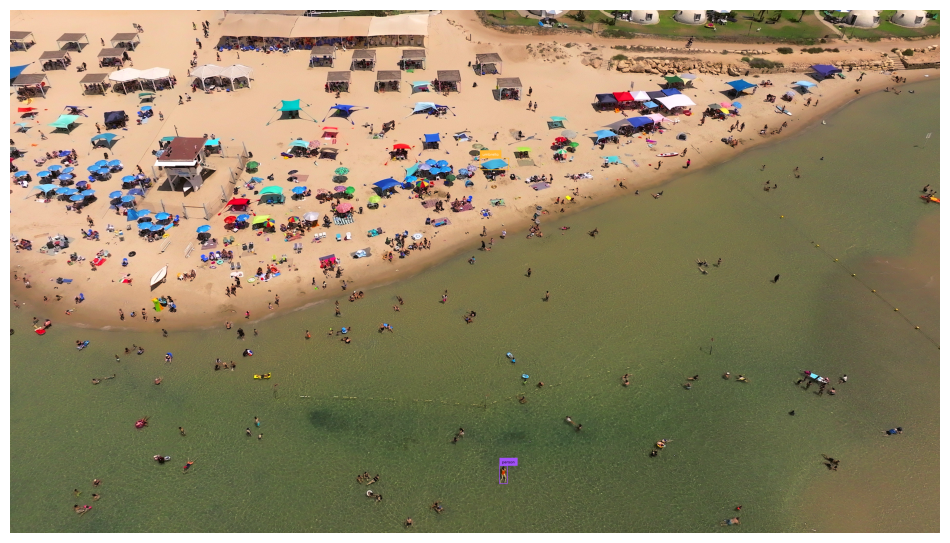

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Input Resolution

Modifying the input resolution of images before detection can enhance small object \
identification at the cost of processing speed and increased memory usage. This \
method is less effective for ultra-high-resolution images (4K and above).

In [17]:
import cv2
import supervision as sv
from inference import get_model

model = get_model(model_id="yolov8x-1280")
image = cv2.imread("small-objects.png")
results = model.infer(image)[0]
detections = sv.Detections.from_inference(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

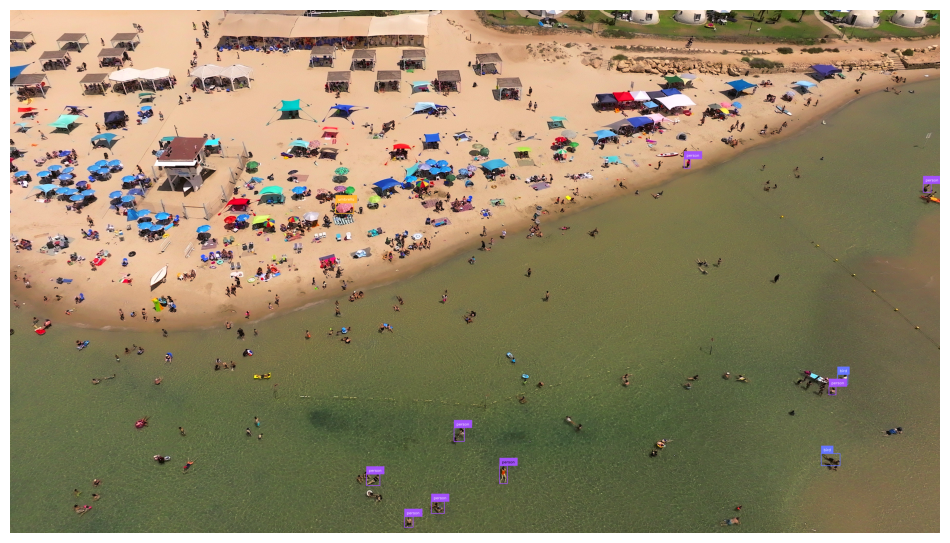

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Inference Slicer

It processes high-resolution images by dividing them into smaller segments, detecting objects within each, and aggregating the results.

In [19]:
import cv2
import numpy as np
import supervision as sv
from inference import get_model

model = get_model(model_id="yolov8x-640")
image = cv2.imread('small-objects.png')

def callback(image_slice: np.ndarray) -> sv.Detections:
    results = model.infer(image_slice)[0]
    return sv.Detections.from_inference(results)

slicer = sv.InferenceSlicer(callback = callback)
detections = slicer(image)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

SupervisionWarnings: `overlap_ratio_wh` in `InferenceSlicer.__init__` is deprecated and will be removed in `supervision-0.27.0`. Please manually set it to `None` and use `overlap_wh` instead.


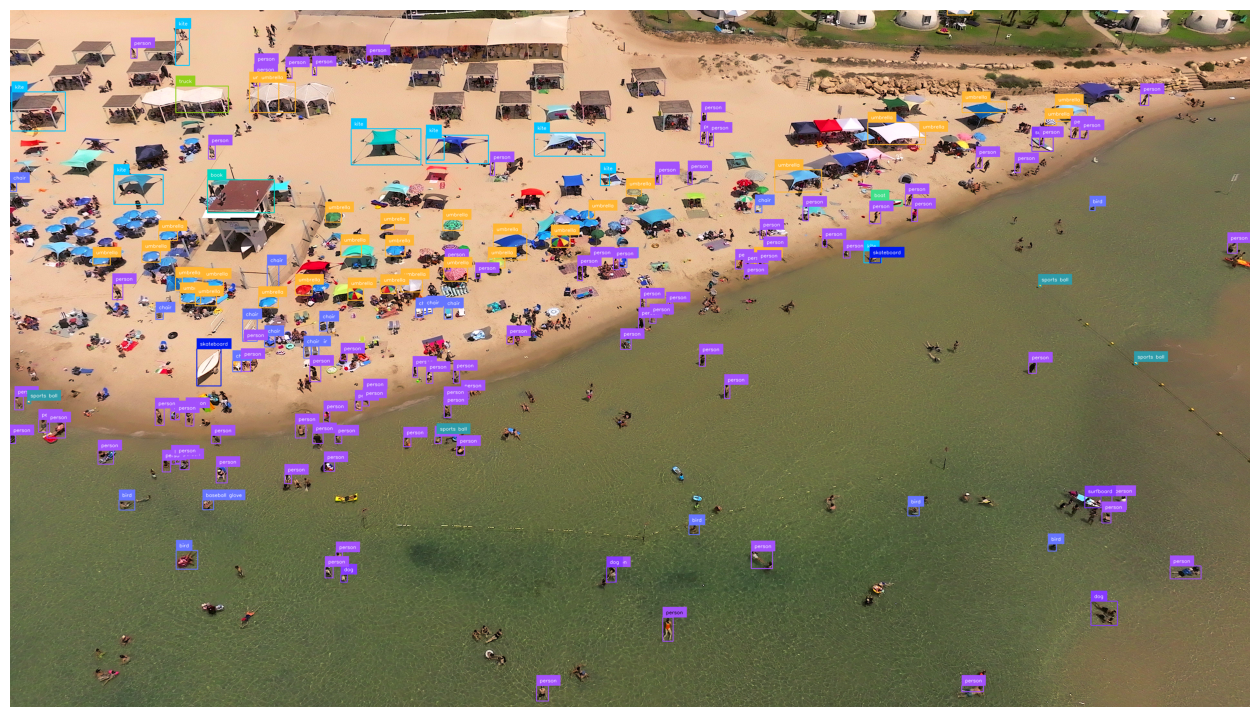

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Inference Slicer on Segmentation Tasks

In [21]:
import cv2
import numpy as np
import supervision as sv
from inference import get_model

model = get_model(model_id="yolov8x-seg-640")
image = cv2.imread('small-objects.png')

def callback(image_slice: np.ndarray) -> sv.Detections:
    results = model.infer(image_slice)[0]
    return sv.Detections.from_inference(results)

slicer = sv.InferenceSlicer(callback = callback)
detections = slicer(image)

mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = mask_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

SupervisionWarnings: `overlap_ratio_wh` in `InferenceSlicer.__init__` is deprecated and will be removed in `supervision-0.27.0`. Please manually set it to `None` and use `overlap_wh` instead.


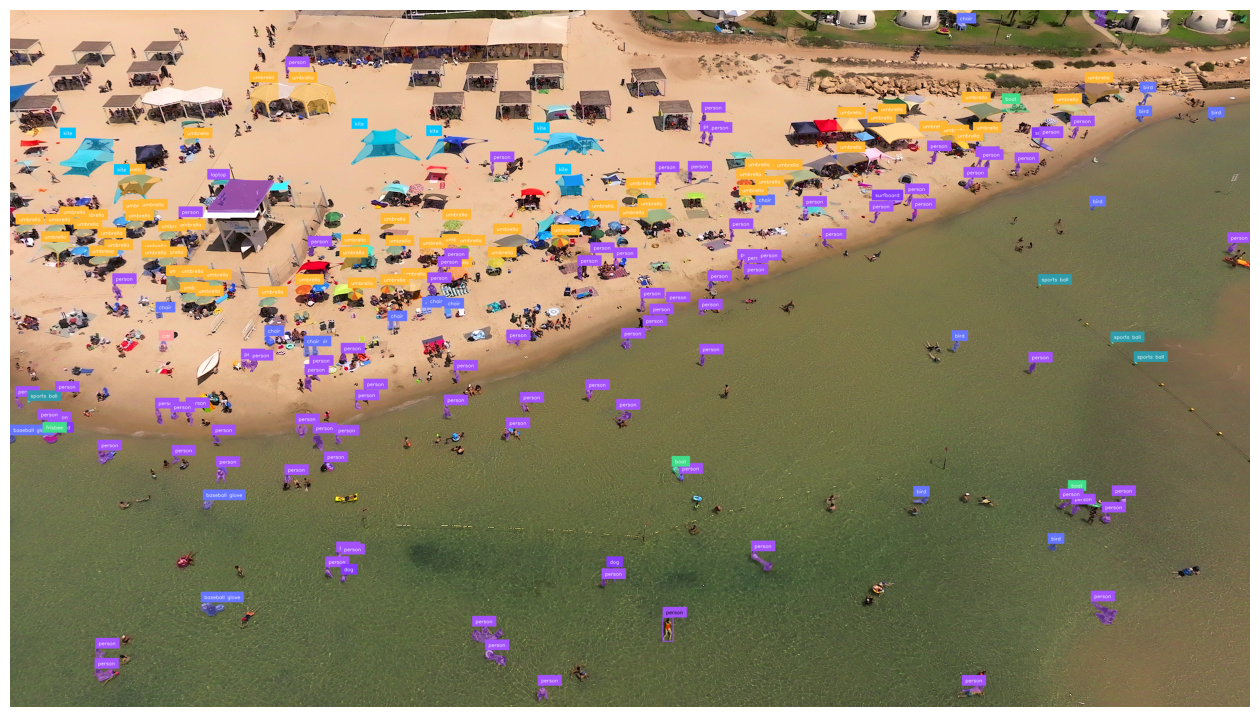

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()